In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
## Parameters

d1 = 53
e = 2.5
alpha = 5

In [50]:
class Courbe:
    def __init__(self, d1, e, alpha):
        self.d1 = d1
        self.e = e
        self.alpha = alpha
        self.curve_x = None
        self.curve_y = None
        self.tan = None
        self.norm = None
        self.n = None
        
    def _compute_curve_point(self, a):
        x = (self.d1 / 2 - self.e * np.cos(3 * a)) * np.cos(a) - 3 * self.e * np.sin(3 * a) * np.sin(a)
        y = (self.d1 / 2 - self.e * np.cos(3 * a)) * np.sin(a) + 3 * self.e * np.sin(3 * a) * np.cos(a)
        return [x, y]
    
    def compute_curve(self, n_points):
        self.n = n_points
        a_array = np.linspace(0, np.deg2rad(360), n_points)
        self.curve_x, self.curve_y = np.zeros(n_points), np.zeros(n_points)
        for i, elem in enumerate(a_array):
            self.curve_x[i], self.curve_y[i] = self._compute_curve_point(elem)
        
    def _compute_tangente(self):
        self.tan = np.zeros((self.n - 1, 2))
        for i in range(self.n - 1):
            prev_idx = (i - 1) % self.n
            next_idx = (i + 1) % self.n
            dx = self.curve_x[next_idx] - self.curve_x[prev_idx]
            dy = self.curve_y[next_idx] - self.curve_y[prev_idx]
            norm_value = np.sqrt(dx**2 + dy**2)
            self.tan[i, 0] = dx / norm_value
            self.tan[i, 1] = dy / norm_value
        
    def _compute_norm(self):
        self.norm = np.zeros_like(self.tan)
        self.norm[:, 0] = self.tan[:, 1]
        self.norm[:, 1] = -self.tan[:, 0]
    
    def plot_curve(self, scale = 5):
        if self.tan is None:
            self._compute_tangente()
        if self.norm is None:
            self._compute_norm()
        
        plt.figure(figsize=(10, 10))
        plt.plot(self.curve_x, self.curve_y, "k+", label="Curve")
        
        normal_label_added = False
        tangent_label_added = False
        for i in range(self.n-1):
            if self.norm is not None:
                plt.arrow(
                    self.curve_x[i], self.curve_y[i],
                    self.norm[i, 0]*scale, self.norm[i, 1]*scale,
                    color="r", label="Normal" if not normal_label_added else "", head_width=0.05
                )
                normal_label_added = True
            if self.tan is not None:
                plt.arrow(
                    self.curve_x[i], self.curve_y[i],
                    self.tan[i, 0]*scale, self.tan[i, 1]*scale,
                    color="g", label="Tangente" if not tangent_label_added else "", head_width=0.05
                )
                tangent_label_added = True
        
        plt.legend()
        plt.axis("equal")
        plt.xlabel("X")
        plt.ylabel("Y")
        
    def check_ortho(self):
        for i in range(self.n - 1):
            print(self.norm[i, 0]*self.norm[i, 1] + self.tan[i, 0]*self.tan[i, 1])
            
    def get_point(self, p):
        return self.curve_x[p], self.curve_y[p], self.norm[p], self.tan[p]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


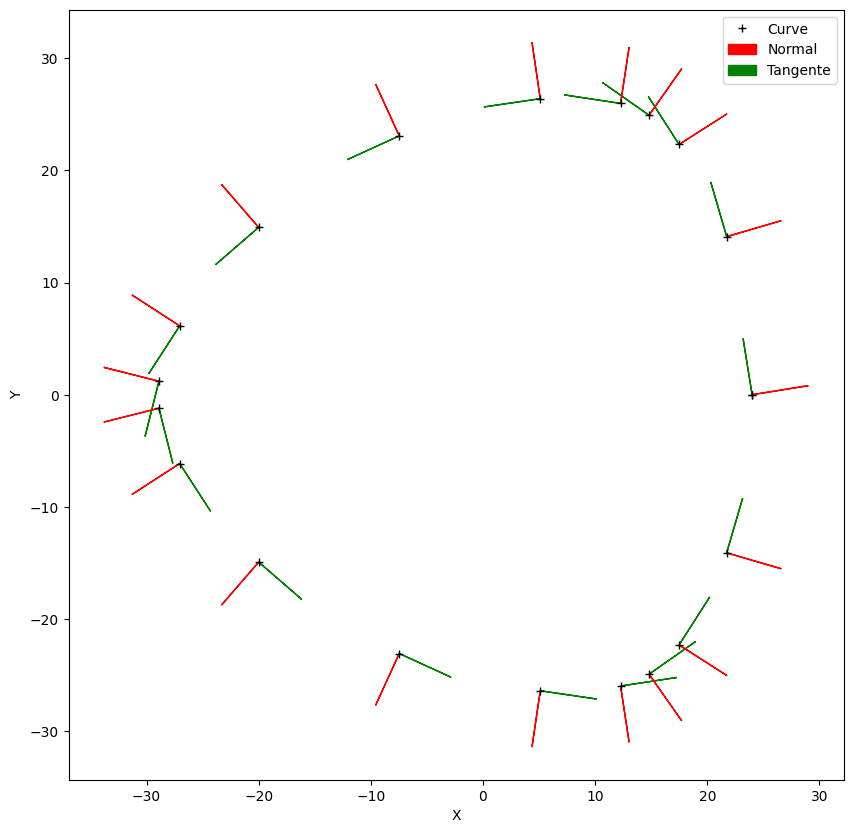

In [51]:
capto = Courbe(d1, e, alpha)
capto.compute_curve(20)
capto.norm
capto.plot_curve()
capto.check_ortho()

In [52]:
capto.get_point(0)

(np.float64(24.0),
 np.float64(0.0),
 array([0.98730946, 0.15880814]),
 array([-0.15880814,  0.98730946]))